<h1>In this notebook, the average number of Games played in each Year is Calculated. Could be used for only keeping records for players who played the majority of the games in a Season<\h1>

<h3>Ensure that you have set up the baseballDB (see - DBSetUp.ipynb) before running this notebook</h3>

<h4>Import Dependencies</h4>

In [1]:
%matplotlib inline

In [2]:
import os
import csv
import pandas as pd

import sqlite3
import csv
from sqlalchemy import create_engine

import matplotlib.pyplot as plt
import numpy as np

from config import pgPassword

<h4>Create a connection to SQL database</h4>

In [3]:
pg_user = 'postgres'
pg_password = pgPassword
db_name = 'baseballDB'

connection_string = f"{pg_user}:{pg_password}@localhost:5432/{db_name}"
engine = create_engine(f'postgresql://{connection_string}')

<h4>Read in databases tables as DatFrames</h4>

In [4]:
teamsDF = pd.read_sql_table("teams", con = engine)
battingDF = pd.read_sql_table("batting", con = engine)
pitchingDF = pd.read_sql_table("pitching", con = engine)
playersDF = pd.read_sql_table("players", con = engine)
franchisesDF = pd.read_sql_table("franchises", con = engine)
salariesDF = pd.read_sql_table("salaries", con = engine)

In [5]:
battingDF.head()

,playerID,yearID,teamID,stint,G,R,H,HR,BB,IBB,SO,SB
0,abercda01,1871,TRO,1,1,0,0,0,0,NaN,0.0,0.0
1,addybo01,1871,RC1,1,25,30,32,0,4,NaN,0.0,8.0
2,allisar01,1871,CL1,1,29,28,40,0,2,NaN,5.0,3.0
3,allisdo01,1871,WS3,1,27,28,44,2,0,NaN,2.0,1.0
4,ansonca01,1871,RC1,1,25,29,39,0,2,NaN,1.0,6.0


In [28]:
gamesDF = battingDF[["playerID", "yearID", "G"]]
gamesDF.groupby(["playerID", "yearID"]).sum()
# gamesDF = gamesDF.reset_index()
# gamesDF = gamesDF.sort_values(by=["yearID"])
gamesDF.head(15)
# leagueGamesDF = gamesDF[["yearID", "G"]]
# leagueGamesDF.groupby("yearID").mean()
# leagueGamesDF.head(50)

,playerID,yearID,G
0,abercda01,1871,1
1,addybo01,1871,25
2,allisar01,1871,29
3,allisdo01,1871,27
4,ansonca01,1871,25
5,armstbo01,1871,12
6,barkeal01,1871,1
7,barnero01,1871,31
8,barrebi01,1871,1
9,barrofr01,1871,18


In [30]:
leagueGamesDF = gamesDF[["yearID", "G"]]
# leagueGamesDF.groupby(["yearID"]).agg({"G": 'mean'})
leagueGamesDF = leagueGamesDF.sort_values(by=["yearID"])
leagueGamesDF.head(15)

,yearID,G
0,1871,1
84,1871,28
83,1871,1
82,1871,33
81,1871,32
80,1871,29
79,1871,1
78,1871,9
77,1871,32
76,1871,32


In [33]:
battedGamesLookupDF = leagueGamesDF.groupby(["yearID"]).agg({"G": 'mean'})

In [35]:
battedGamesLookupDF["gamesToQualify"] = battedGamesLookupDF.G * 2 / 3
battedGamesLookupDF

,G,gamesToQualify
yearID,,
1871,19.965217,13.310145
1872,21.050955,14.033970
1873,28.832000,19.221333
1874,34.138211,22.758808
1875,28.660550,19.107034
...,...,...
2015,47.465680,31.643786
2016,47.505732,31.670488
2017,47.351406,31.567604


In [36]:
battingDF.shape

(107429, 12)

In [49]:
qualifedBattingDF = pd.merge(battingDF, battedGamesLookupDF, on= ["yearID"])
# qualifedBattingDF.drop(columns = "G y")
qualifedBattingDF.head()

,playerID,yearID,teamID,stint,G_x,R,H,HR,BB,IBB,SO,SB,G_y,gamesToQualify
0,abercda01,1871,TRO,1,1,0,0,0,0,NaN,0.0,0.0,19.965217,13.310145
1,addybo01,1871,RC1,1,25,30,32,0,4,NaN,0.0,8.0,19.965217,13.310145
2,allisar01,1871,CL1,1,29,28,40,0,2,NaN,5.0,3.0,19.965217,13.310145
3,allisdo01,1871,WS3,1,27,28,44,2,0,NaN,2.0,1.0,19.965217,13.310145
4,ansonca01,1871,RC1,1,25,29,39,0,2,NaN,1.0,6.0,19.965217,13.310145


In [50]:
qualifedBattingDF = qualifedBattingDF[qualifedBattingDF["G_x"] > qualifedBattingDF["gamesToQualify"]]
qualifedBattingDF.shape

(53706, 14)

<h2>If we chose to focus only on players who played at least 2/3 of the Leage Average number of Games for eaach year, we would be left with 53,706 out of 107,429 total records</h2>

In [6]:
teamsDF.head()

,yearID,teamID,franchID,G,W,R,H,HR,BB,SO,SB,RA,ERA,HA,HRA,BBA,SOA
0,1871,BS1,BNA,31,20,401,426,3,60.0,19.0,73.0,303,3.55,367,2,42,23
1,1871,CH1,CNA,28,19,302,323,10,60.0,22.0,69.0,241,2.76,308,6,28,22
2,1871,CL1,CFC,29,10,249,328,7,26.0,25.0,18.0,341,4.11,346,13,53,34
3,1871,FW1,KEK,19,7,137,178,2,33.0,9.0,16.0,243,5.17,261,5,21,17
4,1871,NY2,NNA,33,16,302,403,1,33.0,15.0,46.0,313,3.72,373,7,42,22


In [11]:
gamesPerYearDF = teamsDF[["yearID", "G"]]
gamesPerYearDF = gamesPerYearDF.groupby(["yearID"]).mean().reset_index()
gamesPerYearDF.head()

,yearID,G
0,1871,28.222222
1,1872,33.272727
2,1873,44.222222
3,1874,58.000000
4,1875,53.076923


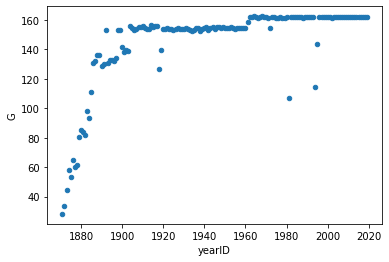

In [12]:
gamesPerYearDF.plot.scatter(x = "yearID", y = "G")